In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [4]:
df = pd.read_csv('HousingPrice-list2.csv', encoding= 'unicode_escape')

In [5]:
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


**EXPLORING & PREPROCESSING DATASET**

In [6]:
# Print the dataset shape
df.shape

(924, 8)

In [7]:
# Print the dataset info to check the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [8]:
# Print the Describe of the data to check if there are outliers
df.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [9]:
# Check null values
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [10]:
# Check duplicates
df.duplicated().sum()

0

**CLEANNING DATA**

In [11]:
# Drop null values
df.dropna(inplace=True)

In [12]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
# Delete un needed columns
df.drop(columns=['Address', 'Zip'], axis=1, inplace=True)

In [14]:
# list each of Categorical and Numerical columns
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

In [15]:
# Dealing with outliers
for col in numerical_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

**VISUALIZATION**

In [26]:
# Define a function to visualize the numerical columns
def num_cols_vis(col):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

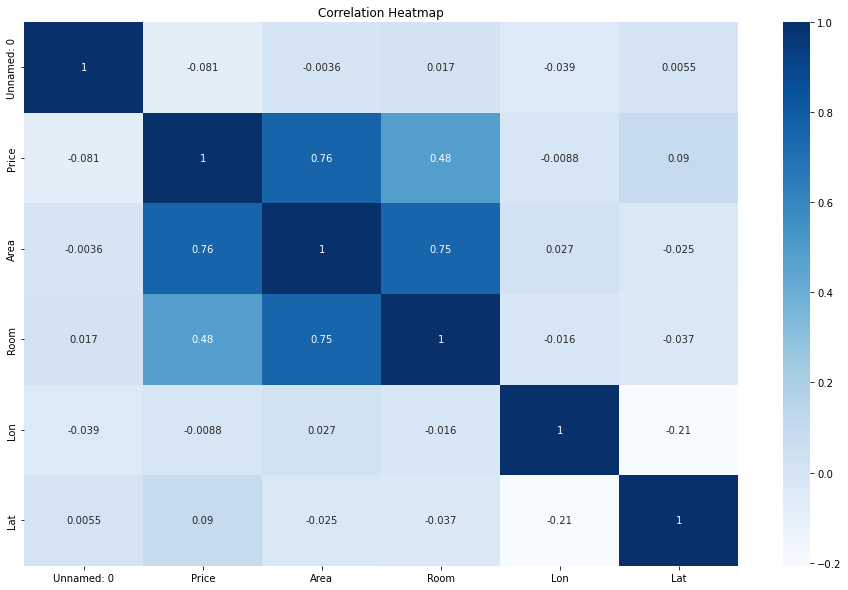

In [18]:
# Display the correlation matrix to find the relationship between each column and the target column
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

**SPLIT** **DATA**

In [19]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the resulting datasets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("Training target variable size:", len(y_train))
print("Testing target variable size:", len(y_test))

Training set size: 703
Testing set size: 176
Training target variable size: 703
Testing target variable size: 176


**RANDOM FOREST REGRESSION (MODEL SELECTION)**

In [21]:
# Define and Train Models
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**PREDICTION AND EVALUATION**

In [22]:
# Predictions
rf_predictions = rf.predict(X_test)

In [23]:
# Evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest MSE:", rf_mse)

Random Forest MSE: 13189801607.771753


In [24]:
# Assuming y_test contains the true values and rf_predictions contains the predicted values
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rf_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, rf_predictions, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 69207.82420454545
Mean Squared Error (MSE): 13189801607.771753
Root Mean Squared Error (RMSE): 114846.86154950754


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**MODEL TUNING**

In [25]:
# Random Forest Hyperparameter Tuning
# Grid of parameters to tune
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=rf_params,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1)

rf_grid.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", np.sqrt(-rf_grid.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest: 141404.06448274368
